In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc

ModuleNotFoundError: No module named 'numpy'

In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juanpabloarenasvlez","key":"5a3c067016d90c54fa052baee280fa72"}'}

In [3]:
# create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          13887        403  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1517         80  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           2620         86  1.0              
devansodariya/student-performance-data       

In [7]:
!kaggle datasets download -d programmerrdai/cancer

 64% 5.00M/7.84M [00:00<00:00, 34.6MB/s]
100% 7.84M/7.84M [00:00<00:00, 49.3MB/s]


In [8]:
!unzip cancer.zip

Archive:  cancer.zip
  inflating: annual-number-of-deaths-by-cause.csv  
  inflating: breast-cancer-survival-rates-vs-gdp-per-capita.csv  
  inflating: cancer-death-rates-by-age.csv  
  inflating: cancer-death-rates-by-type.csv  
  inflating: cancer-death-rates-in-the-us.csv  
  inflating: cancer-death-rates.csv  
  inflating: cancer-deaths-by-age.csv  
  inflating: cancer-deaths-by-type-grouped.csv  
  inflating: cancer-deaths-rate-and-age-standardized-rate-index.csv  
  inflating: death-rate-from-cancers-vs-average-income.csv  
  inflating: disease-burden-rates-by-cancer-types.csv  
  inflating: disease-burden-rates-from-cancers.csv  
  inflating: five-year-survival-rate-from-liver-cancer.csv  
  inflating: five-year-survival-rates-by-cancer-type.csv  
  inflating: five-year-survival-rates-from-breast-cancer.csv  
  inflating: five-year-survival-rates-from-lung-cancer.csv  
  inflating: lung-cancer-deaths-per-100000-by-sex-1950-2002.csv  
  inflating: lung-cancer-survival-rate-vs-gdp

## 1. Lectura y carga del dataset

In [10]:
# upload data
cancer_data = pd.read_csv("annual-number-of-deaths-by-cause.csv")

In [11]:
# view the dataset
cancer_data

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,4490.0,513.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,NaN,1439.0,754.0,215.0,3019.0,2518.0,770.0,...,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,NaN,1457.0,767.0,219.0,3056.0,2050.0,801.0,...,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,NaN,1460.0,781.0,223.0,2990.0,2116.0,818.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,NaN,1450.0,795.0,227.0,2918.0,2088.0,825.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0


## 2. Análisis de la variable objetivo (definir variable)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


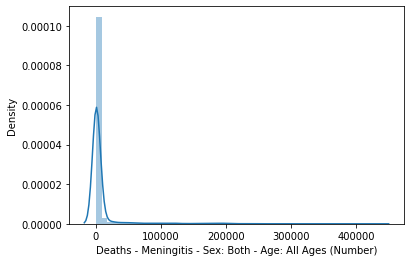

In [12]:
#Distribución de la variable objetivo
sns.distplot(cancer_data['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'])

In [23]:
print('Skewness de la variable objetivo', cancer_data['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'].skew())

Skewness de la variable objetivo 6.829078631837368


#### Observación:

1. presentar observaciones del grafico (ToDo)

In [26]:
#transformación logaritmica de la variable objetivo
cancer_data['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)']=np.log1p(cancer_data['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


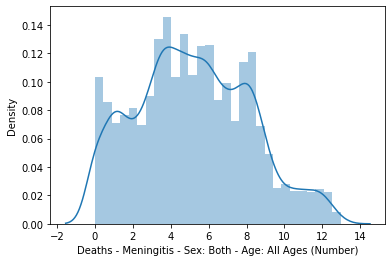

In [27]:
sns.distplot(cancer_data['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'])

# 3. Exploracion de variables

#### 3.1. Datos faltantes

In [28]:
#Porcentaje de datos faltantes para cada variable del dataset
total           = cancer_data.isnull().sum().sort_values(ascending=False)
percent         = (cancer_data.isnull().sum()/cancer_data.isnull().count()*100).sort_values(ascending=False)
missing_cancer  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_cancer

,Total,Percent
Number of executions (Amnesty International),7006,96.328888
Terrorism (deaths),4382,60.250241
Code,1067,14.670700
Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),433,5.953527
Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),433,5.953527
Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),433,5.953527
Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),433,5.953527
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),433,5.953527
Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),433,5.953527
Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),433,5.953527


In [29]:
#Gráfico de los porcentajes de valores perdidos para las variables
plt.figure(figsize=(8,8))
sns.barplot(x = missing_cancer['Number of executions (Amnesty International)':'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)'].Percent, y = missing_cancer.index[0:33]).set_title('Porcentaje de valores perdidos por variable', fontsize=16)
plt.xlabel('Porcentaje de valores perdidos', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

ValueError: ignored

<Figure size 576x576 with 0 Axes>

#### 3.2. Correlación entre las diferentes variables


In [30]:
#Matriz de correlaciones
corr_matrix = cancer_data.corr()

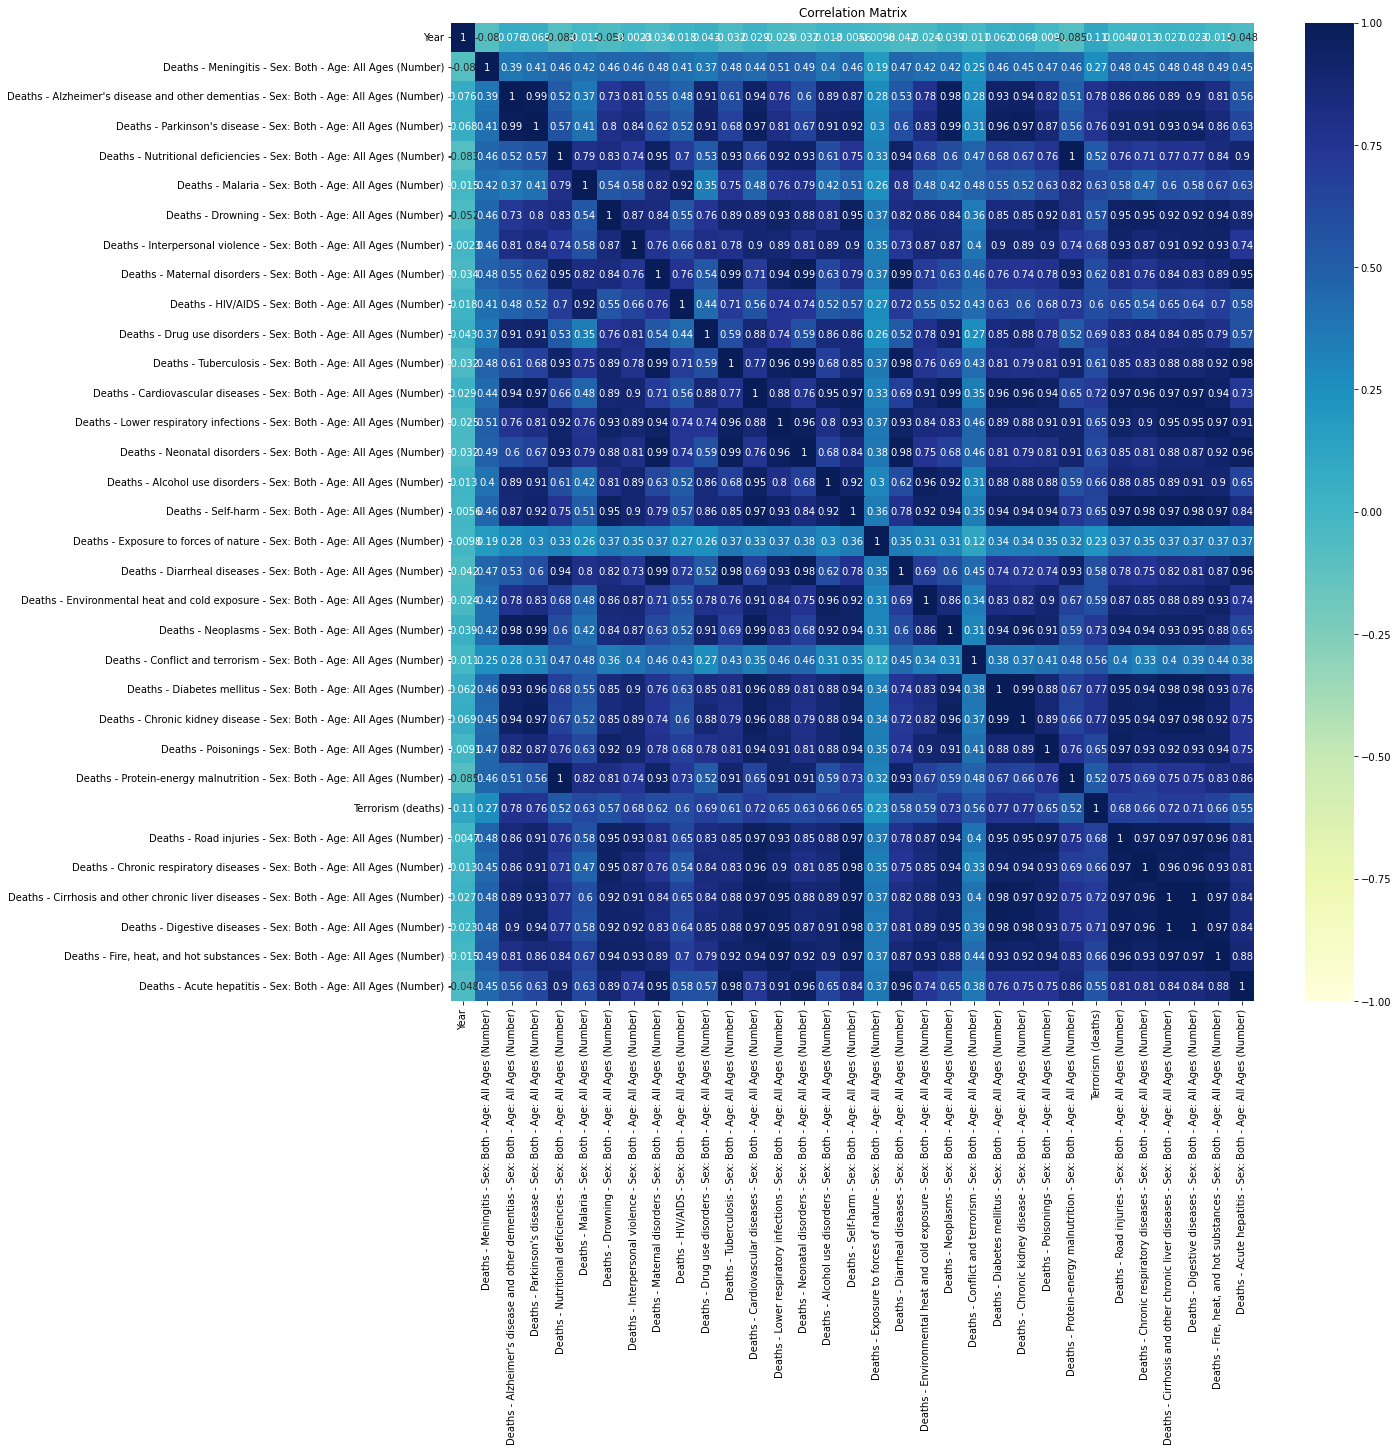

In [31]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [32]:
#Correlaciones de las variables con la variable objetivo (definir la variable)
target_corr_df = pd.DataFrame(corr_matrix["Deaths - Meningitis - Sex: Both - Age: All Ages (Number)"].sort_values(ascending=False))
target_corr_df 

,Deaths - Meningitis - Sex: Both - Age: All Ages (Number)
Deaths - Meningitis - Sex: Both - Age: All Ages (Number),1.000000
Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),0.506445
"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",0.492289
Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),0.491994
Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),0.481777
Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),0.480172
Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),0.479830
Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),0.477828
Deaths - Road injuries - Sex: Both - Age: All Ages (Number),0.475519
Deaths - Poisonings - Sex: Both - Age: All Ages (Number),0.468140


##### Observaciones:
1. Las variables "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)", tiene una alta correlación, aproximadamente de 0.5.
2. Las variables con la correlación más alta son "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)" y "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)".
3. Al observar las correlaciones de las variables con la variable objetivo (por definir), se puede observar que la mayoría de las variables numéricas no tienen una alta correlación con esta.

#### 3.2 Distribución de las variables numéricas

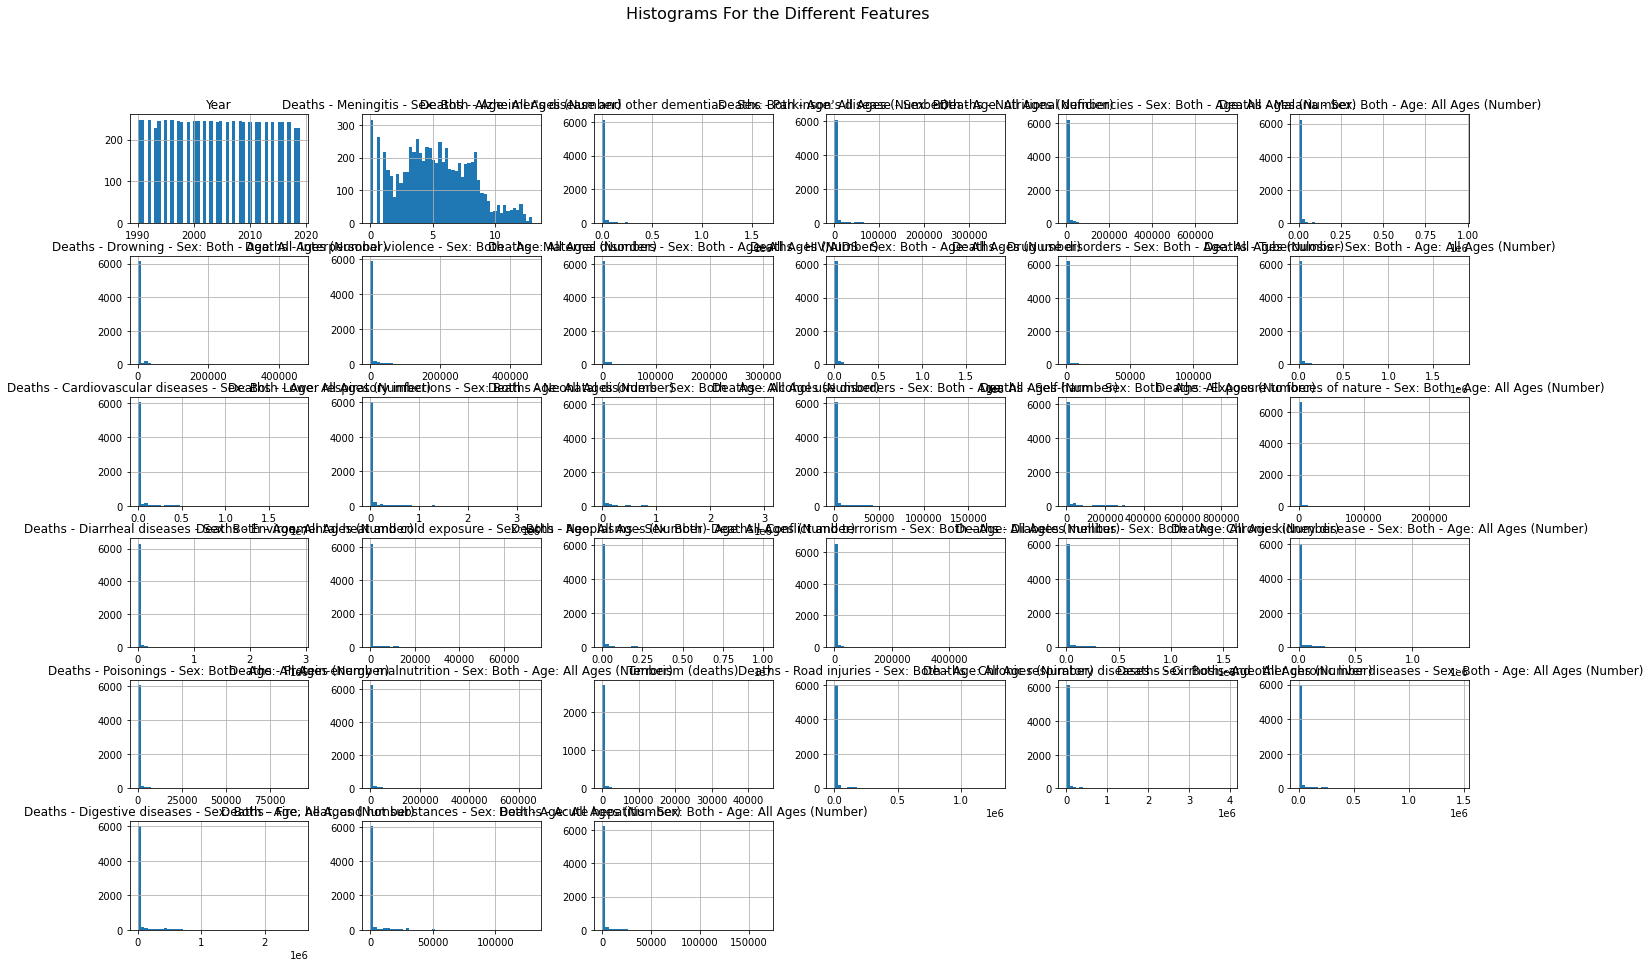

In [33]:
#Gráficos de los histogramas de las distribuciones de las variables
cancer_data.hist(bins=50, figsize=(24,15))
plt.suptitle('Histograms For the Different Features', fontsize=16)
plt.show()